# Challenges

Challenges are brief tasks designed to help you practice specific skills:

- **🗺️ Explore:** Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?
- **📊 Visualise:** Create a plot visualizing the average sales for games in the most popular three genres. Differentiate between NA, EU, and global sales.
- **🔎 Analyse:** Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [2]:
data = pd.read_csv("vgsales.csv")

print(data.shape)
display(data.head())

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df = data.copy()

## **🗺️ Explore:** Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?

In [4]:
seventh_gen = df.copy().query("Platform in ['X360', 'PS3', 'Wii']")
seventh_gen_sales = seventh_gen.groupby('Platform')['Global_Sales'].sum().reset_index()

console = seventh_gen_sales.query("Global_Sales == Global_Sales.max()").Platform.item()
total_sales = seventh_gen_sales.query("Global_Sales == Global_Sales.max()").Global_Sales.item()

print(f"The {console} had the highest total sales globally selling {total_sales} million games.")

The X360 had the highest total sales globally selling 979.96 million games.


In [5]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


## **📊 Visualise:** Create a plot visualizing the average sales for games in the most popular three genres. Differentiate between NA, EU, and global sales.

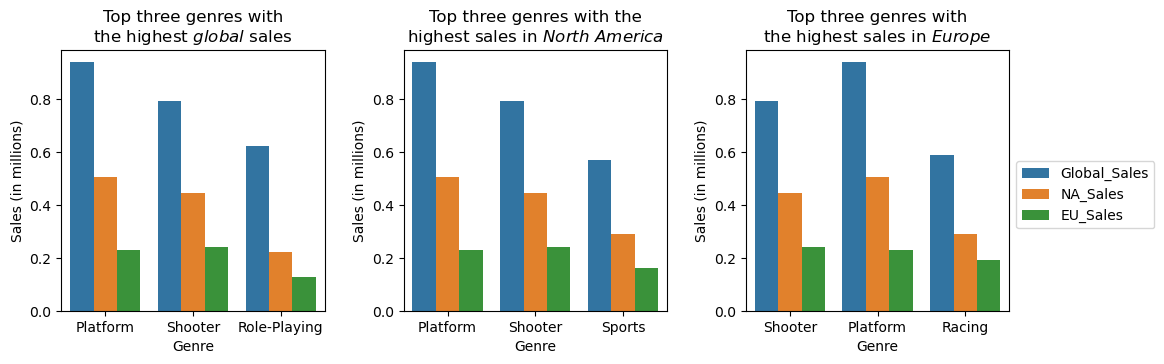

In [6]:
key_features = ['Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales']
sales_features = ['Global_Sales', 'NA_Sales', 'EU_Sales']


def genre_mean_sales(var):
    grouped_by_genre = df.copy()[key_features].groupby('Genre')[sales_features].mean().reset_index()
    genre_mean_sales = grouped_by_genre.sort_values(by=var, ascending=False).reset_index(drop=True).head(3)
    genre_mean_sales_long = pd.melt(genre_mean_sales, id_vars='Genre', value_vars=sales_features).rename(columns={'variable' : 'Sale'})
    
    return genre_mean_sales_long

genre_mean_global_sales = genre_mean_sales('Global_Sales')
genre_mean_na_sales = genre_mean_sales('NA_Sales')
genre_mean_eu_sales = genre_mean_sales('EU_Sales')

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.barplot(data=genre_mean_global_sales, x='Genre', y='value', hue='Sale', ax=axes[0], legend=None)
axes[0].set(title='Top three genres with\nthe highest $\mathit{global}$ sales')

sns.barplot(data=genre_mean_na_sales, x='Genre', y='value', hue='Sale', ax=axes[1], legend=None)
axes[1].set(title='Top three genres with the\nhighest sales in $\mathit{North\ America}$')

sns.barplot(data=genre_mean_eu_sales, x='Genre', y='value', hue='Sale', ax=axes[2])
axes[2].legend(bbox_to_anchor=(1, 0.6))
axes[2].set(title='Top three genres with\nthe highest sales in $\mathit{Europe}$')

for ax in axes:
    ax.set(ylabel='Sales (in millions)')

plt.tight_layout(pad=2)

## **🔎 Analyse:** Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?

,Genre,JP_Sales
0,Role-Playing,0.237
1,Platform,0.148
2,Fighting,0.103
3,Puzzle,0.098
4,Strategy,0.073
5,Simulation,0.073
6,Misc,0.062
7,Sports,0.058
8,Action,0.048
9,Racing,0.045


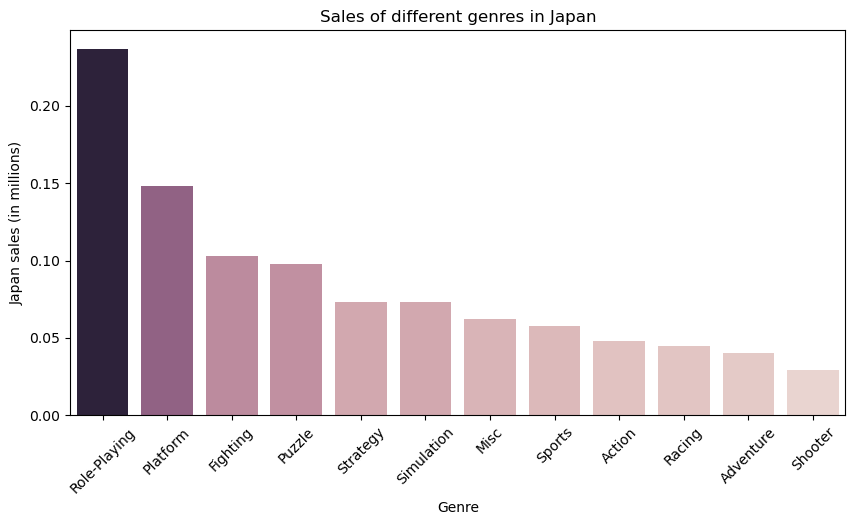

In [8]:
japan_genre_global_sales = df.copy()[['Genre', 'JP_Sales']].groupby('Genre')['JP_Sales'].mean().round(3).reset_index().sort_values('JP_Sales', ascending=False).reset_index(drop=True)
display(japan_genre_global_sales)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=japan_genre_global_sales, x='Genre', y='JP_Sales', hue='JP_Sales', legend=None, ax=ax)
ax.set(title='Sales of different genres in Japan', ylabel="Japan sales (in millions)")
ax.tick_params(axis='x', rotation=45)

In Japan the genres that are significantly more likely to perform better are Role-playing, Platform and Fighting with Role-playing being the top-seller at 237,000 games. Alternatively, the genres that are significantly more likely to perform better are Shooter, Adventure and Racing with Shooter being the worst-seller at 29,000 games.